# Kernel herding vs. kernel greedy examples

In [1]:
%matplotlib inline

In [2]:
import openturns as ot
import otkerneldesign as otkd
from plotools import *

In [3]:
# Random input variable definition
dim = 1
unifrom = ot.Uniform(0., 1.)
distribution = ot.ComposedDistribution([unifrom] * dim)

The scale parameter is setup by the heuristic proposed by L.Pronzato : $\theta = n^{-1/d}$ 

In [4]:
dimension = distribution.getDimension()
size = 50
c_set_size = 512
# Monte Carlo design
mc_design = distribution.getSample(size)
# Kernel definition
#theta = size ** (- 1 / dim)
#theta = 1.
theta= 0.1
ker_list = [ot.MaternModel([theta], [1.0], 2.5)] * dimension
kernel = ot.ProductCovarianceModel(ker_list)
# Kernel herding design
kh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set_size=c_set_size,
    distribution=distribution
)
kh_design = kh.select_design(size)
kh_indexes = kh.get_indices(kh_design)

## 1D current energy plot

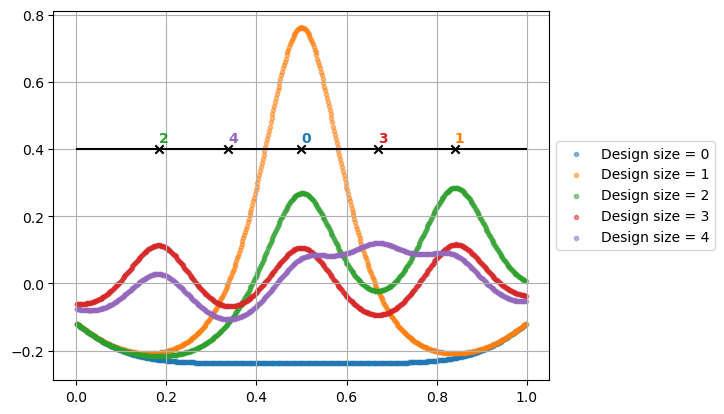

In [6]:
plt.figure()
plot_size = 5
for design_si in range(plot_size):
    current_criterion = kh.compute_criterion(kh_indexes[:design_si])
    plt.scatter(kh._candidate_set, current_criterion, marker='.', label="Design size = {}".format(design_si), alpha=0.5)
    plt.text(kh_design[design_si][0], 0.42 , str(design_si), color='C' + str(design_si), weight='bold')
plt.scatter(kh_design[:design_si+1], 0.4 *np.ones(design_si+1), marker="x", color='k')
plt.hlines(0.4, 0., 1., color='k')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("non_greedy.pdf");